In [1]:
# Step 1 – Data Cleaning & First Look
# Project: Data Science Job & Salary Trends 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Make plots a bit nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --------------------------
# 1. Load the dataset
# --------------------------
# If running locally, put the CSV in your working directory
# Kaggle dataset: 
df = pd.read_csv("../data/raw/salaries.csv")

# Quick shape and peek
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (151445, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [2]:
# --------------------------
# 2. Data overview
# --------------------------
# Info about columns
df.info()

# Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())

# Quick descriptive stats
df.describe(include="all").transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB

Missing values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
emplo

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,151445.0,NaN,NaN,NaN,2024.435313,0.671842,2020.0,2024.0,2025.0,2025.0,2025.0
experience_level,151445,4,SE,87491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,151445,4,FT,150541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,151445,422,Data Scientist,18751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,151445.0,NaN,NaN,NaN,162837.963135,208012.396413,14000.0,106000.0,147000.0,199000.0,30400000.0
salary_currency,151445,26,USD,143173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,151445.0,NaN,NaN,NaN,157527.458411,74150.772377,15000.0,105800.0,146100.0,198000.0,800000.0
employee_residence,151445,104,US,135506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,151445.0,NaN,NaN,NaN,20.938625,40.620393,0.0,0.0,0.0,0.0,100.0
company_location,151445,97,US,135569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# --------------------------
# 3. Initial Cleaning
# --------------------------
# Standardize column names (lowercase, replace spaces with _)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Un-cleaned shape:", df.shape)
# Drop duplicates if any
df = df.drop_duplicates()

# Example: convert salary_in_usd to numeric if needed
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors="coerce")

# Drop rows with no salary
df = df.dropna(subset=['salary_in_usd'])

print("Cleaned shape:", df.shape)

Un-cleaned shape: (151445, 11)
Cleaned shape: (71913, 11)


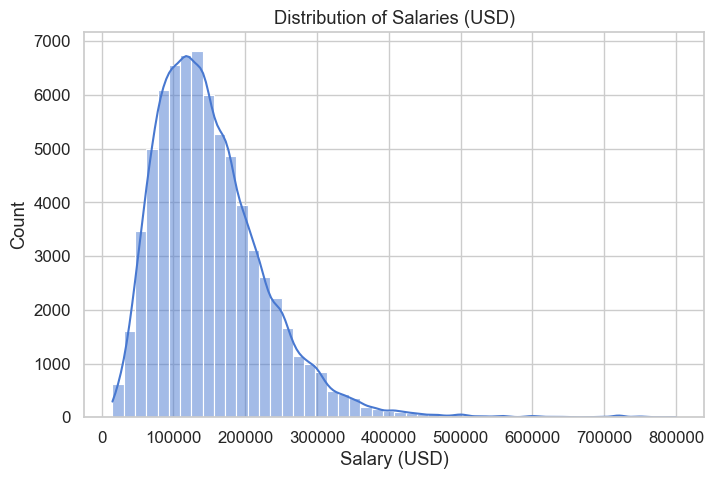

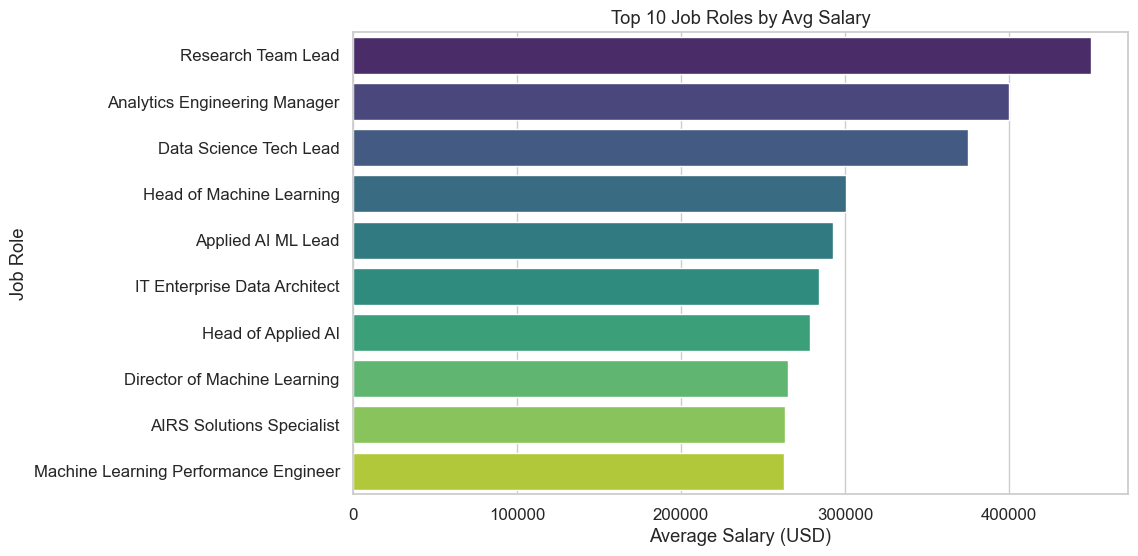

In [4]:
# --------------------------
# 4. First Exploratory Plots
# --------------------------

# Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Distribution of Salaries (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()

# Average salary by role
plt.figure(figsize=(10,6))
role_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=role_salary.values, y=role_salary.index, palette="viridis")
plt.title("Top 10 Job Roles by Avg Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Role")
plt.show()

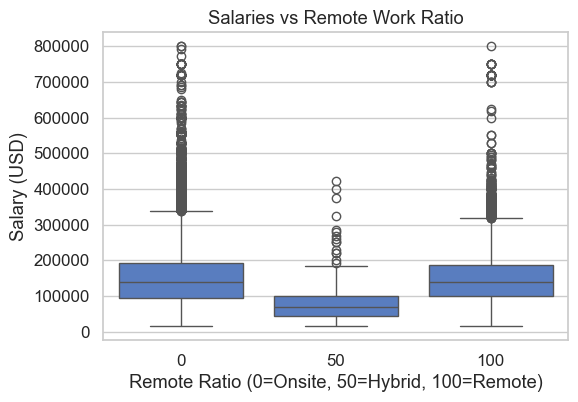

In [5]:
# --------------------------
# 5. Salary by Remote Ratio
# --------------------------
if 'remote_ratio' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
    plt.title("Salaries vs Remote Work Ratio")
    plt.xlabel("Remote Ratio (0=Onsite, 50=Hybrid, 100=Remote)")
    plt.ylabel("Salary (USD)")
    plt.show()

### Salaries vs Remote Work Ratio
- Remote (100) roles show higher variability and some of the highest-paying jobs.
- Hybrid (50) roles generally earn less than both onsite and fully remote roles.
- Remote work offers access to global pay scales, explaining higher outliers.

In [6]:
# --------------------------
# 7. Save the cleaned dataset
# --------------------------
import os

# Define the path
save_path = "../data/processed/ds_salaries_2025_clean.csv"

# Create parent directories if they don't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save cleaned dataset
df.to_csv(save_path, index=False)
print("✅ Cleaned dataset saved at", save_path)

✅ Cleaned dataset saved at ../data/processed/ds_salaries_2025_clean.csv


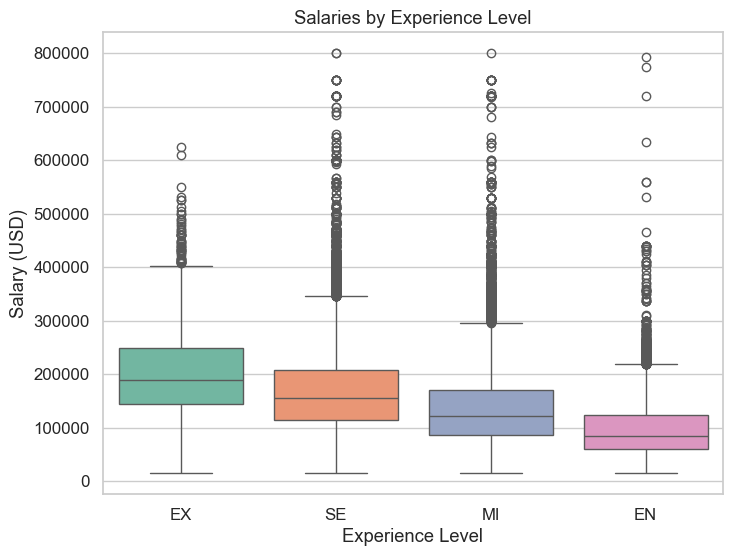

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette="Set2")
plt.title("Salaries by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

### Salaries by Experience Level
- Clear upward trend: **Executives (EX) > Senior (SE) > Mid (MI) > Entry (EN)**.
- Entry-level salaries cluster at the lower end, while executives show wide spread.
- Outliers represent high-paying senior/executive roles in top markets.

# Week 2: Exploratory Data Analysis (EDA)

In this step, we explore the **Data Science job salaries dataset (2025)** to understand:
- Salary distributions and variation
- How salaries differ by job role, seniority, region, and remote work
- Emerging insights that will guide predictive modeling and NLP analysis later

We’ll use **visualizations and group statistics** to tell the story.

### Salary by Job Title (Top 15 roles)

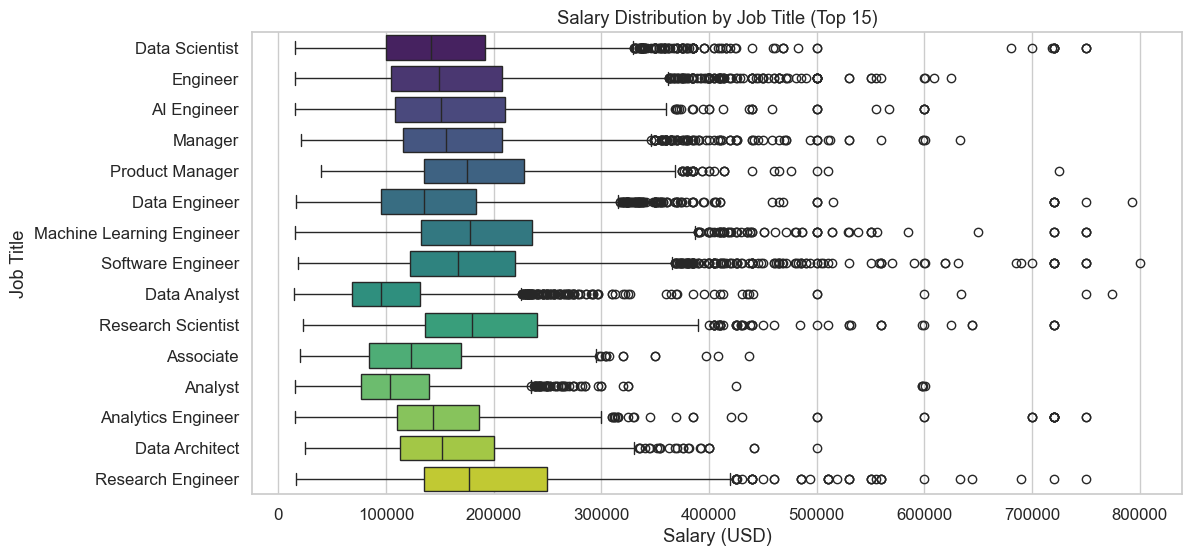

In [8]:
plt.figure(figsize=(12,6))
top_roles = df['job_title'].value_counts().nlargest(15).index
sns.boxplot(y='job_title', x='salary_in_usd', 
            data=df[df['job_title'].isin(top_roles)], palette="viridis")
plt.title("Salary Distribution by Job Title (Top 15)")
plt.xlabel("Salary (USD)")
plt.ylabel("Job Title")
plt.show()

### Salary Distribution by Job Title (Top 15)
- **AI Engineers, ML Engineers, and Data Scientists** dominate top salary brackets.
- Analyst and Associate roles sit at the lower end.
- Job title strongly influences salary range, not just experience.

### Salary by Company Location (Top 10 regions)

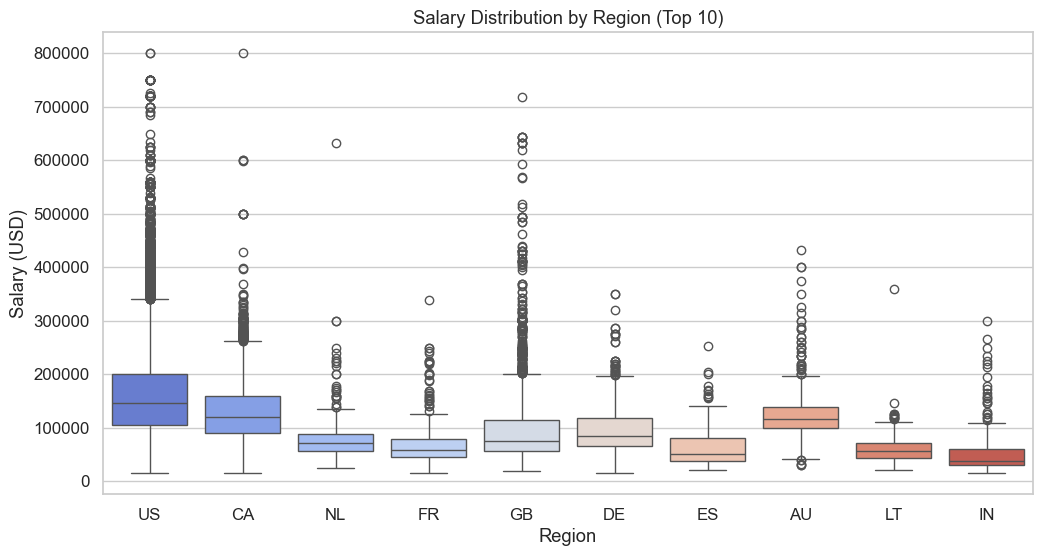

In [9]:
plt.figure(figsize=(12,6))
top_regions = df['company_location'].value_counts().nlargest(10).index
sns.boxplot(x='company_location', y='salary_in_usd', 
            data=df[df['company_location'].isin(top_regions)], palette="coolwarm")
plt.title("Salary Distribution by Region (Top 10)")
plt.xlabel("Region")
plt.ylabel("Salary (USD)")
plt.show()

### Salary Distribution by Region (Top 10)
- The **US consistently leads**, with the widest spread and highest salaries.
- Western Europe (DE, FR, GB, NL) offers mid-to-high salaries.
- Emerging markets (IN, LT, ES) lag significantly, even for senior roles.

### Salary Heatmap (Region vs Seniority; TOP 15)

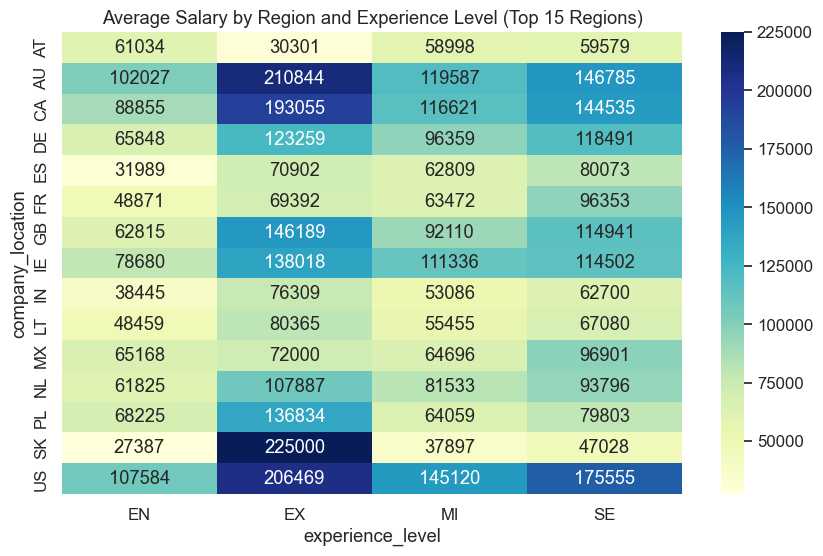

In [10]:
# Pick top 15 regions with most entries
top_regions = df['company_location'].value_counts().nlargest(15).index

pivot = df[df['company_location'].isin(top_regions)].pivot_table(
    values='salary_in_usd', 
    index='company_location', 
    columns='experience_level', 
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Salary by Region and Experience Level (Top 15 Regions)")
plt.show()

### Average Salary by Region and Experience Level (Heatmap)
- **US, Canada, and Switzerland** offer the highest pay at all levels.
- Emerging markets like **India and Mexico** show large gaps compared to developed regions.
- The gap between **entry-level and executive roles** is widest in US/CA.

# Week 3: Predictive Modeling – Salary Prediction

In this step, we build machine learning models to predict salaries based on:
- Experience level
- Job title
- Company location
- Remote ratio
- Employment type

We’ll:
1. Prepare features and encode categorical variables.
2. Train baseline models (Linear Regression).
3. Train advanced models (Random Forest, XGBoost).
4. Evaluate performance using RMSE and R².
5. Interpret results with feature importance and SHAP values.

## Feature Engineering

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Select features
features = ['experience_level', 'job_title', 'company_location', 'remote_ratio', 'employment_type']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
cat_cols = ['experience_level', 'job_title', 'company_location', 'employment_type']
num_cols = ['remote_ratio']

# Preprocessor (One-hot for categorical, passthrough for numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

## Baseline Model - Linear Regression

In [12]:
# Pipeline: preprocessing + linear regression
linreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', LinearRegression())])

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Linear Regression Performance:
RMSE: 65935.53467430435
R²: 0.28166398917045254


## Advanced Models (Random Forest & XGBoost)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model', RandomForestRegressor(n_estimators=200, random_state=42))])

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R²:", r2_score(y_test, rf_pred))

# XGBoost
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42))])

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R²:", r2_score(y_test, xgb_pred))

Random Forest Performance:
RMSE: 65639.20806591594
R²: 0.28810615283416796
XGBoost Performance:
RMSE: 65246.15593274442
R²: 0.2966063618659973


## Feature Importance

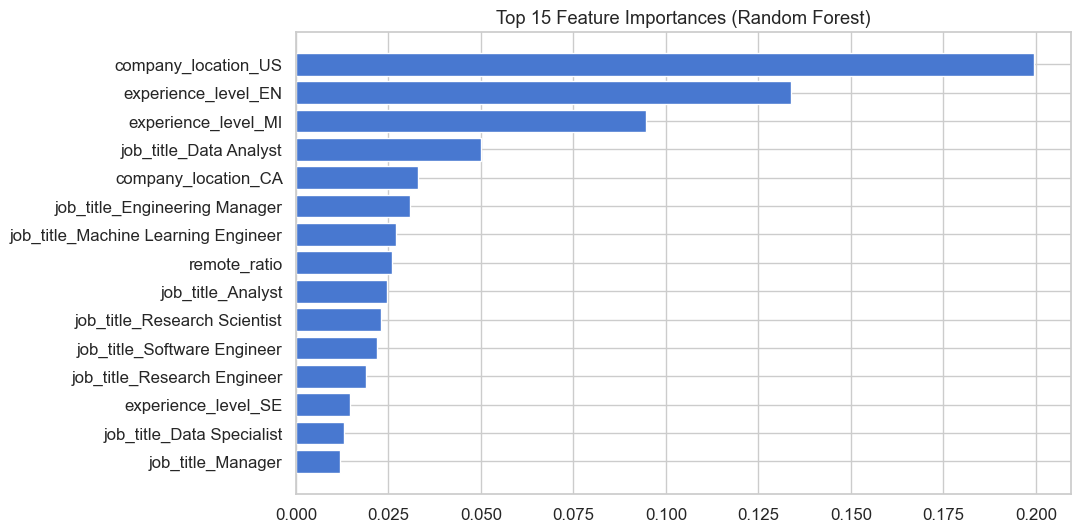

In [14]:
import matplotlib.pyplot as plt

# Get feature names from one-hot encoder
onehot_features = list(linreg.named_steps['preprocessor']
                       .transformers_[0][1]
                       .get_feature_names_out(cat_cols))

all_features = onehot_features + num_cols

# Feature importances from Random Forest
importances = rf.named_steps['model'].feature_importances_

# Sort and plot top 15
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10,6))
plt.barh(np.array(all_features)[indices], importances[indices])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()